# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Tedy Hermawanto
- **Email:** tedyhermawanto@gmail.com
- **ID Dicoding:** tedy_hermawanto_yYJn


## Menentukan Pertanyaan Bisnis

- Does rain, extreme temperatures or strong winds affect the number of people renting bicycles?
- Has the number of bicycle rentals increased or decreased over a period of time?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
day_df = pd.read_csv('./Submission/data/day.csv')
hour_df = pd.read_csv('./Submission/data/hour.csv')
print(day_df.head())
print(hour_df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

**Insight:**
- read day csv and hour csv datasets
- display the first 5 rows with .head()

### Assessing Data

In [58]:
print (day_df.info())
print (hour_df.info())

day_df.describe()
hour_df.describe()

day_df.isnull().sum()
hour_df.isnull().sum()

day_df.isna().sum()
hour_df.isna().sum()

print("Jumlah Duplikasi: ", day_df.duplicated().sum())
print("Jumlah Duplikasi: ", hour_df.duplicated().sum())

print(day_df.nunique())
print(hour_df.nunique())

day_df.describe()
# hour_df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   instant             731 non-null    int64         
 1   dteday              731 non-null    datetime64[ns]
 2   season              731 non-null    int64         
 3   yr                  731 non-null    int64         
 4   mnth                731 non-null    int64         
 5   holiday             731 non-null    int64         
 6   weekday             731 non-null    int64         
 7   workingday          731 non-null    int64         
 8   weathersit          731 non-null    int64         
 9   temp                731 non-null    float64       
 10  atemp               731 non-null    float64       
 11  hum                 731 non-null    float64       
 12  windspeed           731 non-null    float64       
 13  casual              731 non-null    int64         

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year_month_numeric
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,12.528044
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,1.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,7.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,13.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,19.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,24.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,6.920307


**Insight:**
- there is an error in the date data type on day_df, it should be datetime not object
- there is a power type error in hours_df, should be datetime not object

### Cleaning Data

In [83]:
hours_df = pd.read_csv('./Submission/data/hour.csv')
day_df = pd.read_csv('./Submission/data/day.csv')
hours_df.dropna(inplace=True)
day_df.dropna(inplace=True)
hours_df['dteday'] = pd.to_datetime(hours_df['dteday'])
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hours_df.info()
day_df.info()
hours_df.fillna(value=hours_df.mean(), inplace=True)
day_df.fillna(value=day_df.mean(), inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [84]:
hours_df.drop_duplicates(inplace=True)
hours_df.head(10)
day_df.drop_duplicates(inplace=True)
day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [85]:
hours_df.rename(columns={'dteday': 'date', 'yr':'year', 'mnth':'month', 'hr':'hour', 'cnt':'count'}, inplace=True)
day_df.rename(columns={'dteday': 'date', 'cnt':'count'}, inplace=True)
hours_df.info()
day_df.info()
hours_df.head()
hours_df.describe()
hours_df.groupby(by="year").agg({
    "workingday": ["max", "min", "mean", "std"]
})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   date        17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   year        17379 non-null  int64         
 4   month       17379 non-null  int64         
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  count       17379 non-

workingday                        
            max min      mean       std
year                                   
0             1   0  0.683748  0.465040
1             1   0  0.681704  0.465842

**Insight:**
- check for missing values and copies.
- changed over the date column information sort to datetime sort
- Gathering the information by year and weekday gives profound bits of knowledge into how bicycle rentals are influenced by weekdays and yearly patterns.

## Exploratory Data Analysis (EDA)

### Explore ...

In [121]:
print("Dataset Information:")
print(day_df.info())
print("\nStatistical Summary:")
print(day_df.describe())

season_counts = day_df['season'].value_counts()
weather_counts = day_df['weathersit'].value_counts()
weekday_counts = day_df['weekday'].value_counts()

print("\nDistribution of 'season' (1=Winter, 2=Spring, 3=Summer, 4=Fall):")
print(season_counts)

print("\nDistribution of 'weathersit' (1=Clear, 2=Cloudy, 3=Rain/Snow):")
print(weather_counts)

print("\nDistribution of 'weekday' (0=Sunday, 6=Saturday):")
print(weekday_counts)

numerical_columns = day_df.select_dtypes(include=[np.number]).columns
correlation_matrix = day_df[numerical_columns].corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

# Rentals by weather season
season_rentals_mean = day_df.groupby('season')['count'].mean()
season_rentals_median = day_df.groupby('season')['count'].median()
print("\nMean and Median Bike Rentals by Season:")
print("Mean:\n", season_rentals_mean)
print("Median:\n", season_rentals_median)

# Rentals by weather condition
weather_rentals_mean = day_df.groupby('weathersit')['count'].mean()
weather_rentals_median = day_df.groupby('weathersit')['count'].median()
print("\nMean and Median Bike Rentals by Weather Condition:")
print("Mean:\n", weather_rentals_mean)
print("Median:\n", weather_rentals_median)

# Rentals by weekday
weekday_rentals_mean = day_df.groupby('weekday')['count'].mean()
weekday_rentals_median = day_df.groupby('weekday')['count'].median()
print("\nMean and Median Bike Rentals by Weekday:")
print("Mean:\n", weekday_rentals_mean)
print("Median:\n", weekday_rentals_median)


# Rentals by working day
workingday_rentals_mean = day_df.groupby('workingday')['count'].mean()
workingday_rentals_median = day_df.groupby('workingday')['count'].median()
print("\nMean and Median Bike Rentals by Working Day:")
print("Mean:\n", workingday_rentals_mean)
print("Median:\n", workingday_rentals_median)

day_df['date'] = pd.to_datetime(day_df['date'])
day_df['year'] = day_df['date'].dt.year
day_df['month'] = day_df['date'].dt.month

#group by year
monthly_rentals_mean = day_df.groupby(['year', 'month'])['count'].mean()
monthly_rentals_median = day_df.groupby(['year', 'month'])['count'].median()
print("\nAverage Bike Rentals by Year and Month:")
print(monthly_rentals_mean)
print("\nMedian Bike Rentals by Year and Month:")
print(monthly_rentals_median)

#rental growth yearly
yearly_rentals_mean = day_df.groupby('year')['count'].mean()
yearly_rentals_median = day_df.groupby('year')['count'].median()
print("\nYearly Mean and Median Bike Rentals:")
print("Mean:\n", yearly_rentals_mean)
print("Median:\n", yearly_rentals_median)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   date        731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  count       731 non-null    int64         
 16  year_

**Insight:**
- Seasons and the weather have the most effects on bike rentals. While harsh weather conditions like high temperatures or strong winds can reduce the amount of bike rentals, comfortable temperatures tend to stimulate more bike rentals.
- Weekday bicycle rentals are typically more expensive than weekend rentals, suggesting that a lot of people utilize bicycles for daily tasks like riding to work.
- Temporal patterns indicate that the number of bike rentals is growing with time, along with the popularity of bike-sharing services.


## Visualization & Explanatory Analysis

### Pertanyaan 1:


Correlation Matrix between Weather Conditions and Bike Rentals:
               temp     atemp       hum  windspeed     count
temp       1.000000  0.991702  0.126963  -0.157944  0.627494
atemp      0.991702  1.000000  0.139988  -0.183643  0.631066
hum        0.126963  0.139988  1.000000  -0.248489 -0.100659
windspeed -0.157944 -0.183643 -0.248489   1.000000 -0.234545
count      0.627494  0.631066 -0.100659  -0.234545  1.000000


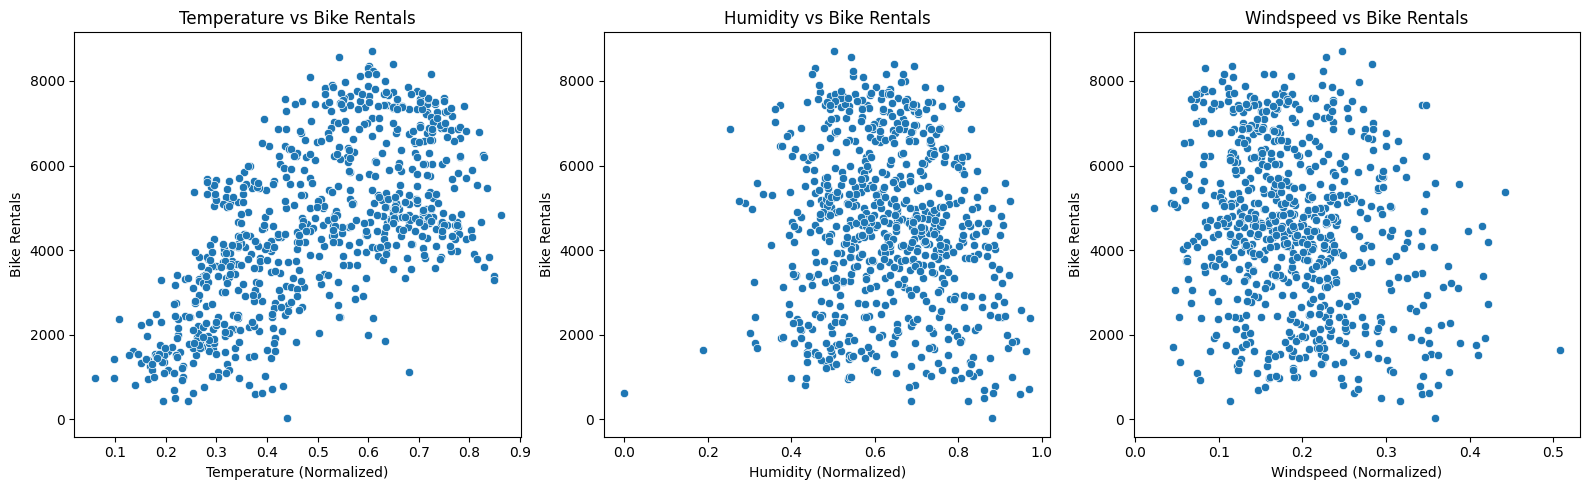

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


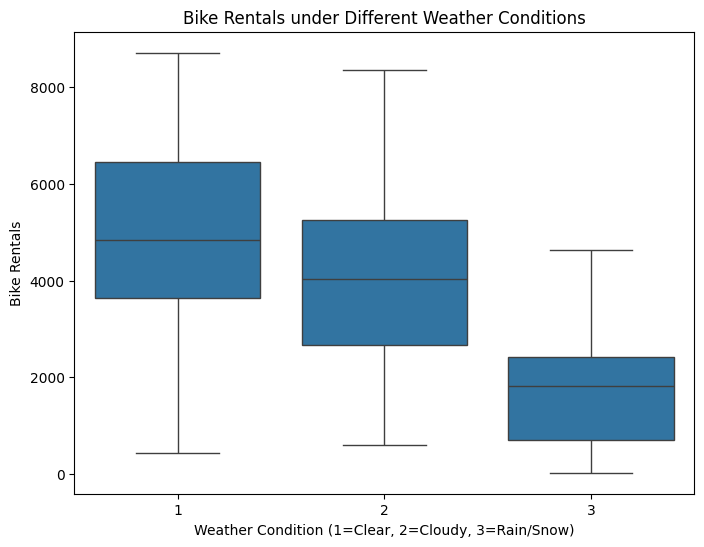

In [124]:
correlation = day_df[['temp', 'atemp', 'hum', 'windspeed', 'count']].corr()
print("\nCorrelation Matrix between Weather Conditions and Bike Rentals:")
print(correlation)

plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='temp', y='count', data=day_df)
plt.title('Temperature vs Bike Rentals')
plt.xlabel('Temperature (Normalized)')
plt.ylabel('Bike Rentals')

# Scatter plot for Humidity vs Bike Rentals
plt.subplot(1, 3, 2)
sns.scatterplot(x='hum', y='count', data=day_df)
plt.title('Humidity vs Bike Rentals')
plt.xlabel('Humidity (Normalized)')
plt.ylabel('Bike Rentals')

# Scatter plot for Windspeed vs Bike Rentals
plt.subplot(1, 3, 3)
sns.scatterplot(x='windspeed', y='count', data=day_df)
plt.title('Windspeed vs Bike Rentals')
plt.xlabel('Windspeed (Normalized)')
plt.ylabel('Bike Rentals')

plt.tight_layout()
plt.show()

# Boxplot to visualize the effect of weather conditions on bike rentals
plt.figure(figsize=(8, 6))
sns.boxplot(x='weathersit', y='count', data=day_df)
plt.title('Bike Rentals under Different Weather Conditions')
plt.xlabel('Weather Condition (1=Clear, 2=Cloudy, 3=Rain/Snow)')
plt.ylabel('Bike Rentals')
plt.show()

### Pertanyaan 2:

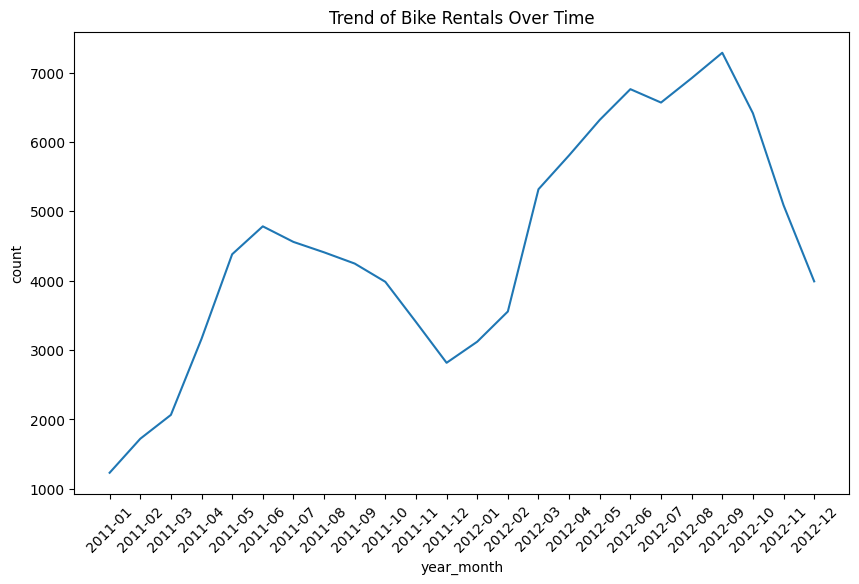

In [99]:
day_df['date'] = pd.to_datetime(day_df['date'])
day_df['year_month'] = day_df['date'].dt.to_period('M').astype(str)

plt.figure(figsize=(10, 6))
sns.lineplot(x='year_month', y='count', data=day_df, errorbar=None)
plt.title('Trend of Bike Rentals Over Time')
plt.xticks(rotation=45)
plt.show()

**Insight:**
- From the correlation matrix, we saw the relationships between weather factors and bike rentals. The scatter plots for temperature, humidity, and windspeed also help visualize these relationships. The boxplot visualizes how different weather conditions affect the rental count.
- The line plot of bike rentals over time clearly shows whether the trend is increasing or decreasing.


## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution question 1
Bike rentals are affected by weather factors such wind speed and temperature, with temperature having a larger association. Rain and other inclement weather have a negative impact on bike rentals, as this boxplot illustrates.


- Conclution question 2
 The trend of bike rentals over time shows an overall increase, indicating the service is growing in popularity over time.